<a href="https://colab.research.google.com/github/egimat/randomwalk/blob/main/BreastCancerDetection_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**

In [ ]:
from google.colab import drive
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# **Set-up environment**

In [ ]:
# Check if drive is not already mounted
if not os.path.exists('/content/drive'):
    # Mount Google Drive
    drive.mount('/content/drive')
    print("Google Drive is mounted.")
else:
    print("Google Drive is already mounted.")

Mounted at /content/drive
Google Drive is mounted.


In [ ]:
# Specify the path to the .zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/Coding/Kaggle/uciml_breast-cancer-wisconsin-data.zip'

# Specify the extraction path
extraction_path = '/content/extracted_data/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the contents of the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the paths of .csv files in the extraction directory
csv_file_paths = [os.path.join(extraction_path, file) for file in os.listdir(extraction_path) if file.endswith('.csv')]

# Display the list of .csv file paths
csv_file_paths

['/content/extracted_data/data.csv']

In [ ]:
# # Check if Kaggle is not already installed
if not os.path.exists('/usr/local/bin/kaggle'):
    # Install Kaggle
    !pip install kaggle
    print("Kaggle is installed.")
else:
    print("Kaggle is already installed.")

Kaggle is already installed.


In [ ]:
# # Set the path to the Kaggle API key in Google Drive
kaggle_key_path = '/content/drive/MyDrive/Coding/Kaggle/kaggle.json'

# Check if Kaggle API key is not already uploaded
if not os.path.exists('/root/.kaggle/kaggle.json'):
    # Copy Kaggle API key from Google Drive to Colab
    !mkdir -p /root/.kaggle/
    !cp "$kaggle_key_path" /root/.kaggle/kaggle.json
    # Set appropriate permissions
    !chmod 600 /root/.kaggle/kaggle.json
    print("Kaggle API key is uploaded.")
else:
    print("Kaggle API key is already uploaded.")

In [ ]:
# # Copy API command from Kaggle dataset
dataset_path = input("Enter Kaggle dataset path (e.g., uciml/breast-cancer-wisconsin-data): ")

# Construct the full command
!kaggle datasets download -d {dataset_path}

# !kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Enter Kaggle dataset path (e.g., uciml/breast-cancer-wisconsin-data): uciml/breast-cancer-wisconsin-data
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 2.02MB/s]


In [ ]:
# file_name = 'breast-cancer-wisconsin-data.zip' #the file is your dataset exact name
# # with ZipFile(file_name, 'r') as zip_ref:
# #     # Assuming the CSV file is named 'data.csv' within the zip file
# #     csv_file_path = zip_ref.extract('data.csv', path='/content')
# #     print("Path to the CSV file:", csv_file_path)

# with ZipFile(file_name, 'r') as zip_ref:
#     # List the names of files in the .zip file
#     zip_file_content = zip_ref.namelist()

#     # Assuming the first CSV file found is the one you want
#     csv_files = [file for file in zip_file_content if file.endswith('.csv')]
#     if csv_files:
#         csv_file_path = zip_ref.extract(csv_files[0], path='/content')
#         print("Path to the CSV file:", csv_file_path)

#         # Now you can use pd.read_csv with csv_file_path
#         df = pd.read_csv(csv_file_path)

#         # Additional processing or analysis using the DataFrame 'df' can be done here
#     else:
#         print("No CSV file found in the dataset.")


# **Access and explore data**

In [ ]:
df = pd.read_csv('/content/extracted_data/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# **Objectives setting**

Using the [Wisconsin Breast Cancer Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) (Diagnostic) to predict whether a tumor is benign (0) or malignant (1) based on characteristics of the cells, such as radius, texture, smoothness, etc.

The distribution of outcomes is uneven (benign diagnoses are more common than malignant) and there is a bias in terms of the importance of the outcomes (classifying all malignant cases correctly is of the utmost importance: **reduce Type II error**).

**1. The target variable is binary:**
 *One of the most basic assumptions of logistic regression is that the outcome variable needs to be binary, which means there are two possible outcomes. Multinomial logistic regression is an exception to this assumption and is beyond the scope of this lesson.*

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

**2. Independent observations:**
*Checking for independent observations in a data set is important for logistic regression. This can be violated if, in this case, patients are biopsied multiple times (repeated sampling of the same individual).*

In [ ]:
df.id.nunique()==df.id.count()

True

**3. Large enough sample size:**
*Since logistic regression is fit using maximum likelihood estimation instead of least squares minimization, there must be a large enough sample to get convergence. When a model fails to converge, this causes the estimates to be extremely inaccurate. Often a rule of thumb is that there should be at least 10 samples per feature for the smallest class in the outcome variable.*

*For example, if there were 100 samples and the outcome variable diagnosis had 60 benign tumors and 40 malignant tumors, then the max number of features allowed would be 4. To get 4 we took the smallest of the classes in the outcome variable, 40, and divided it by 10.*

In [ ]:
# How many features should we have at max?
min(df.diagnosis.value_counts())/10

21.2

**4. No influential outliers:**
*Logistic regression is sensitive to outliers, so we must remove any extremely influential outliers for model building. Outliers are a broad topic with many different definitions – z-scores, scaler of the interquartile range, Cook’s distance/influence/leverage, etc – so there are many ways to identify them. But here, we will use visual tools to rule out obvious outliers.*

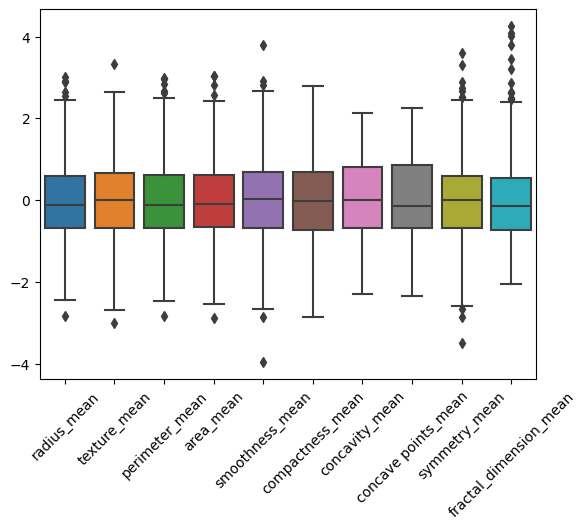

In [ ]:
# Define the labels for which we are going to predict:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()

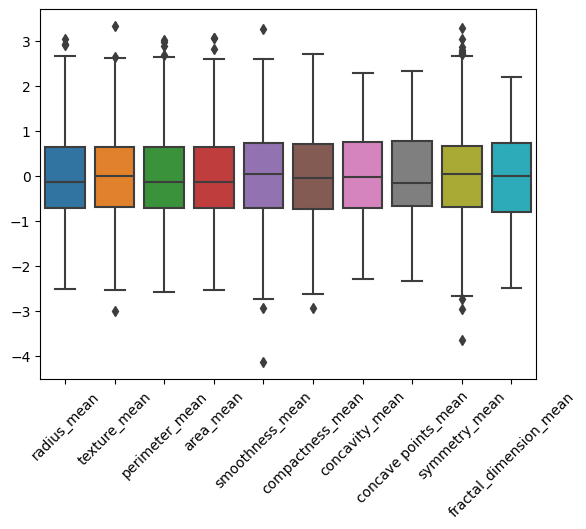

In [ ]:
# Remove any samples that are above the 90 percentile in the feature that shows the biggest outlier: 'smoothness_mean'.
q_hi  = df["fractal_dimension_mean"].quantile(0.90)
df_fil = df[(df["fractal_dimension_mean"] < q_hi)]

sns.boxplot(data=np.log(df_fil[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define labels and features:

X=df_fil[predictor_var]
y=df_fil['diagnosis']

**5. Features linearly related to log odds:**
*The underlying assumption of logistic regression is that the features are linearly related to the logit of the outcome. To test this visually, we can use Seaborn’s regplot, with the parameter logistic= True and the x value as our feature of interest. If this condition is met, the fit model will resemble a sigmoidal curve (as is the case when x=radius_mean).*

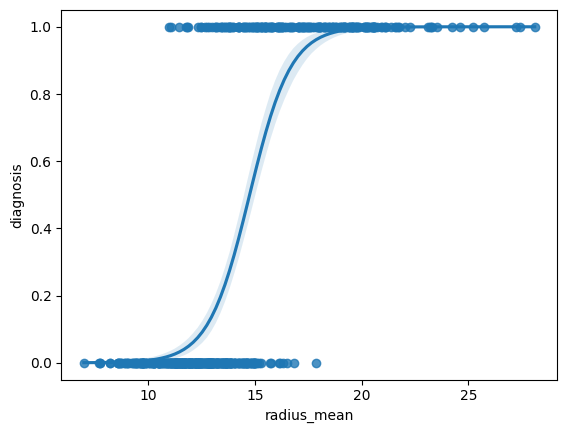

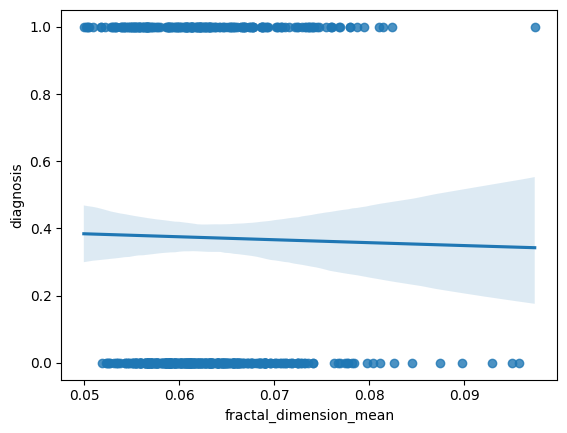

In [ ]:
sns.regplot(x= 'radius_mean', y= 'diagnosis', data= df, logistic= True,)
plt.show()

sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()

**6. Multicollinearity:**  *Like in linear regression, one of the assumptions is that there is no multicollinearity in the data. Meaning the features should not be highly correlated. Multicollinearity can cause the coefficients and p-values to be inaccurate. With a correlation plot, we can see which features are highly correlated and then we can drop one of the features.
We’re going to look at the “mean” features which are highly correlated with each other using a heatmap correlation plot.*

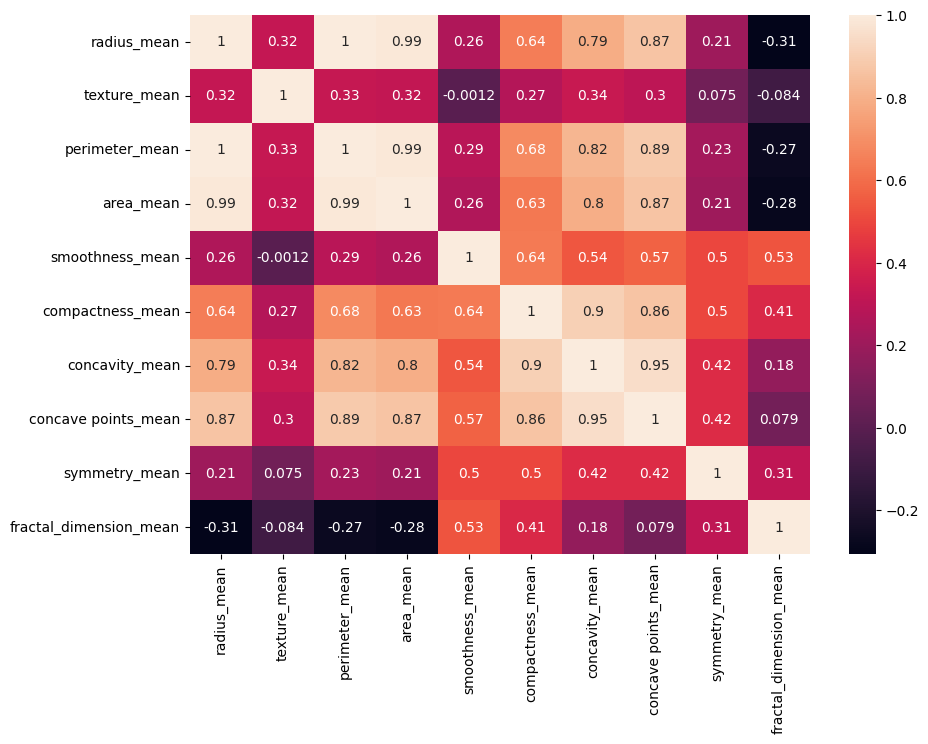

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(X.corr(), annot=True)
plt.show()

From the heatmap above we can see that there are highly correlated parameters:

In [ ]:
correlated_features=[['radius_mean', 'perimeter_mean', 'area_mean'],['concavity_mean','compactness_mean']]

# **Model implementation**

Set-up train and test datasets:

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

Create model. In this case we are interested in a LogisticRegression model.

*Despite the name, logistic regression is being used as a classifier.*

In [ ]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Fit the model to the train dataset and print coefficients and intercept:

In [ ]:
log_reg.fit(X_train,y_train)
coeff=log_reg.coef_
intercept=log_reg.intercept_

print(f'Model coefficients:\t{coeff}')
print(f'Model intercept:\t{intercept}')

Model coefficients:	[[-1.53761919  0.26196638  0.53900418 -0.00875038  0.2353186   0.30766029
   0.70406181  0.39079034  0.20124302  0.05820224]]
Model intercept:	[-28.45709601]


Predict the outcome variable:

In [ ]:
y_pred=log_reg.predict(X_test)

Evaluate the model.

Since logistic regression is being used as a classifier, any evaluation metrics for classification tasks will apply.

The simplest metric is **accuracy** – how many correct predictions did we make out of the total? However, when classes are imbalanced, this can be a misleading metric for model performance.

Similarly, if we care more about accurately predicting a certain class, other metrics may be more appropriate to use, such as **precision**, **recall**, or **F1-score** may be better to evaluate performance.

For the breast cancer dataset, predicting ALL malignant cases as malignant is of the utmost importance – and even if there are some false positives (benign cases that are marked as malignant), these likely will be discovered by follow-up tests. Whereas missing a malignant case (classifying it as benign) could have deadly consequences. Thus, we want to **minimize false negatives**. This in turn will maximize the recall ratio (also known as the sensitivity or true positive rate).

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

print(f'Test set accuracy:\t{accuracy:.3f}')
print(f'Test set precision:\t{precision:.3f}')
print(f'Test set recall:\t{recall:.3f}')
print(f'Test set f1-score:\t{f1:.3f}')

Test set accuracy:	0.896
Test set precision:	0.837
Test set recall:	0.837
Test set f1-score:	0.837


Measure results via confusion matrix:

In [ ]:
confusion =confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(
    confusion,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)

print("\033[1mResults baseline model:\033[0m")
print()
print(f'Baseline Recall score: {recall:.3f}')
print(f'Baseline Accuracy score: {accuracy:.3f}')
print()
print(conf_matrix)

Results baseline model:

Baseline Recall score: 0.837
Baseline Accuracy score: 0.896

            predicted no  predicted yes
actual no             97              8
actual yes             8             41


In [ ]:
TN, FP, FN, TP = confusion.ravel()

print(f'False negatives:\t{FN}')

False negatives:	8


# **Prediction Thresholds**

Logistic regression not only predicts the class of a sample, but also the probability of a sample belonging to each class. It provides us with a measure of certainty associated with each prediction. In the default implementation in scikit-learn, a probability greater than 50% means that the predicted outcome will belong to the positive class. This is referred to as a prediction threshold.

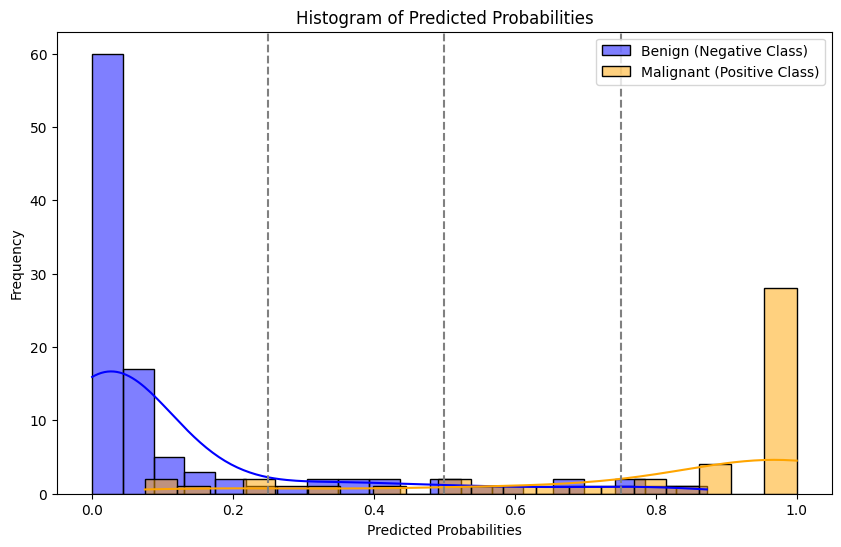

In [ ]:
y_pred_prob=log_reg.predict_proba(X_test)[:,1]

thresholds=[0.25,0.5,0.75]

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob[y_test == 0], color='b', kde=True, label='Benign (Negative Class)',bins=20)
sns.histplot(y_pred_prob[y_test == 1], color='orange', kde=True, label='Malignant (Positive Class)',bins=20)

for threshold in thresholds:
    plt.axvline(x=threshold, color='grey', linestyle='--')

plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

The histogram of the predicted probabilities for the logistic regression classifier is shown above. The benign (or negative class) is depicted in blue, and the malignant (or positive class) in orange for the breast cancer data set. The benign cases are heavily clustered around zero, which is good as they will be correctly classified as benign, whereas malignant cases are heavily clustered around one. The vertical lines depict hypothetical threshold values at 25%, 50%, and 75%. For the highest threshold, almost all the samples above 75% belong to the malignant class, but there will be some benign cases that are misdiagnosed as malignant (false positives). In addition, there are a number of malignant cases that are missed (false negatives). If instead the lowest threshold value is used, almost all the malignant cases are identified, but there are more false positives.

Therefore, the value of the threshold is an additional lever that can be used to tune a model’s predictions. A higher value is generally associated with fewer false positives and more false negatives. Whereas a lower value is associated with fewer false negatives and more false positives.

In [ ]:
# Test a custom threshold
custom_threshold = 0.75
y_pred_custom_threshold = (y_pred_prob >= custom_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_cust = accuracy_score(y_test, y_pred_custom_threshold)
recall_cust = recall_score(y_test, y_pred_custom_threshold)
conf_matrix_cust = confusion_matrix(y_test, y_pred_custom_threshold)

conf_matrix_cust = pd.DataFrame(
    conf_matrix_cust,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes'])

print("\033[1mResults with custom prediction threshold:\033[0m")
print()
print(f'Custom Recall score: {recall_cust:.3f}')
print(f'Custom Accuracy score: {accuracy_cust:.3f}')
print()
print(conf_matrix_cust)
print()

# Calculate ROC curve and AUC
fpr_c, tpr_c, thresholds_c = roc_curve(y_test, y_pred_custom_threshold)
roc_auc_cust = auc(fpr_c, tpr_c)

f"Model's separability score (AUC) = {roc_auc_cust:.2f}"



Results with custom prediction threshold:

Custom Recall score: 0.735
Custom Accuracy score: 0.890

            predicted no  predicted yes
actual no            101              4
actual yes            13             36



"Model's separability score (AUC) = 0.85"

Changing the prediction threshold, the performance of the model change as well. Since our objective is minimizing the False Negatives, we might be interested in finding the maximum threshold that ensures the minimum FN we are willing to accept (max_FN):

In [ ]:
max_FN=2

#Array of thresholds
thresh = np.linspace(0,1,100)
false_negatives = []

for t in thresh:
  cm = confusion_matrix(y_test, (y_pred_prob>t)*1.0)
  false_negatives.append(cm[1][0])
thresh_choice = thresh[np.argmax(np.array(false_negatives)>=max_FN)]

print(f'Minimum threshold that would maximize False Negatives to {max_FN}: {thresh_choice:.3f}')

Minimum threshold that would maximize False Negatives to 2: 0.081


# **ROC and AUC**

There is a continuum of predictions available in a single model by varying the threshold incrementally from zero to one. For each of these thresholds, the True Positive Rate (TPR) and the False Positive Rate (FPR) can be calculated and then plot. The resulting curve these points form is known as the Receiver Operating Characteristic (ROC) curve.

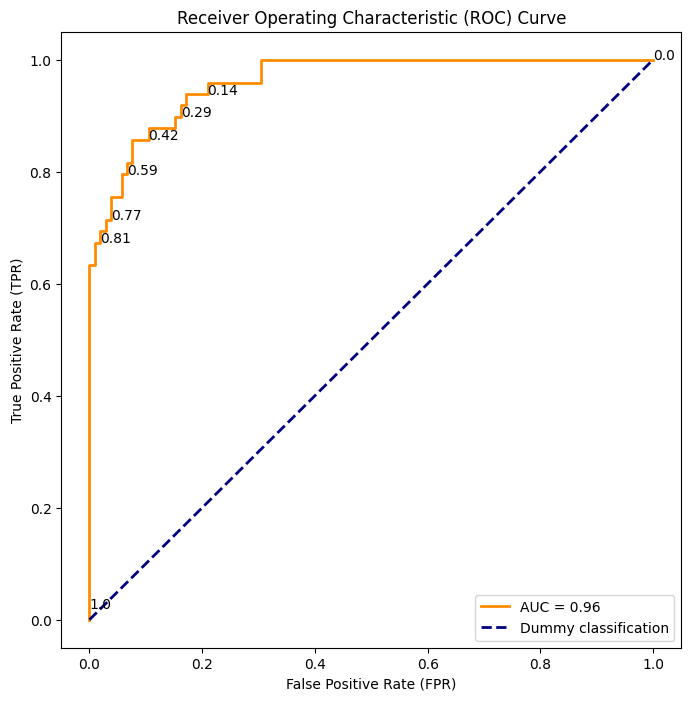

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Dummy classification',linestyle='--')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Model separability score:
f"Model's separability score (AUC) = {roc_auc:.2f}"

"Model's separability score (AUC) = 0.96"

In the ROC curve plotted above, the True Positive Rate (**TPR = TP / TP + FN**) is on the y-axis and the False Positive Rate (**FPR = FP / TN + FP**) is on the x-axis. The ROC curve is the orange line and the dashed blue line is the '*Dummy classification*' line, which is the equivalent of random guessing.

The ROC curve can help us decide on a threshold that best fits our specific classification problem.

# **Correcting class imbalance**

Class imbalance is when your binary classes for the outcome variable are not evenly split. Technically, anything different from a 50/50 distribution would be imbalanced and need appropriate care. In the case of rare events, sometimes the positive class can be less than 1% of the total. If classes are significantly imbalanced, this could create a bias towards the majority class since the model learns that it can have a higher accuracy if it predicts the majority class more often.

**Positivity Rate:** *We can use the positivity rate to tell us how balanced our classes are. The positivity rate is the rate of occurrence for the positive class. With our breast cancer data, the formula is **Positivity Rate = Total Malignant Cases / Total Cases**. If our positivity rate is close to .5, then our classes are balanced.*

In [ ]:
# Calculate positivity rate:

train_pos_rate=sum(y_train)/y_train.shape[0]
print(f'Train positivity rate: {train_pos_rate:.3f}')

test_pos_rate=sum(y_test)/y_test.shape[0]
print(f'Test positivity rate: {test_pos_rate:.3f}')


Train positivity rate: 0.377
Test positivity rate: 0.318


The positivity rate achieved by the original model shows a sensible class imbalance.

**Stratification:**  *If the classes are imbalanced (more likely to happen with smaller datasets like this) then this difference can become even greater after we split the data into a training and testing dataset. One way to mitigate this is to randomly split using stratification on the class labels.*

*Stratification is when the data is sorted into subgroups to ensure a nearly equal class distribution in your train and test sets.*

In [ ]:
# Re-train the model with a stratified train/test split:

X_train_str, X_test_str, y_train_str, y_test_str=train_test_split(X,y, test_size=0.3,stratify=y)

log_reg.fit(X_train_str,y_train_str)
y_pred_str = log_reg.predict(X_test_str)

recall_str = recall_score(y_test_str, y_pred_str)
accuracy_str = accuracy_score(y_test_str, y_pred_str)

confusion_str =confusion_matrix(y_test_str, y_pred_str)

conf_matrix_str = pd.DataFrame(
    confusion_str,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)

print("\033[1mResults with Stratification:\033[0m")
print()
print(f'Stratified Recall score: {recall_str:.3f}')
print(f'Stratified Accuracy score: {accuracy_str:.3f}')
print()
print(conf_matrix_str)


Results with Stratification:

Stratified Recall score: 0.800
Stratified Accuracy score: 0.909

            predicted no  predicted yes
actual no             96              3
actual yes            11             44


After using stratification, the training and testing datasets should have a very similar positivity rate (but stratification does not necessarily cause the positivity rate of the dataset to reach closer to .5)

In [ ]:
# Calculate positivity rate with a stratified train/test split:

train_pos_rate_str=sum(y_train_str)/y_train_str.shape[0]
print(f'Stratified train positivity rate: {train_pos_rate_str:.3f}')

test_pos_rate_str=sum(y_test_str)/y_test_str.shape[0]
print(f'Stratified test positivity rate: {test_pos_rate_str:.3f}')

Stratified train positivity rate: 0.360
Stratified test positivity rate: 0.357


**Under/Over sampling:** *To bring the positivity rate of the dataset closer to .5, we can undersample the majority class or oversample the minority class. For oversampling, repeated samples (with replacement) are taken from the minority class until the size is equal to that of the majority class. This causes the same data to be used multiple times, giving a higher weight to these samples. Alternatively, undersampling leaves out some of the majority class data to have the same number of samples as the minority class, leaving fewer data to build the model.*

In [ ]:
# Define oversampling pipeline
over_sampling_pipeline = Pipeline([
    ('oversampler', RandomOverSampler(sampling_strategy='minority')),
    ('model', log_reg)
])

# Train and evaluate models with oversampling
over_sampling_pipeline.fit(X_train_str, y_train_str)
y_pred_over = over_sampling_pipeline.predict(X_test_str)

recall_over = recall_score(y_test_str, y_pred_over)
accuracy_over = accuracy_score(y_test_str, y_pred_over)

confusion_over =confusion_matrix(y_test_str, y_pred_over)

conf_matrix_over = pd.DataFrame(
    confusion_over,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)

In [ ]:
# Define undersampling pipeline
under_sampling_pipeline = Pipeline([
    ('undersampler', RandomUnderSampler(sampling_strategy='majority')),
    ('model', log_reg)
])

# Train and evaluate models with undersampling
under_sampling_pipeline.fit(X_train_str, y_train_str)
y_pred_under = under_sampling_pipeline.predict(X_test_str)

recall_under = recall_score(y_test_str, y_pred_under)
accuracy_under = accuracy_score(y_test_str, y_pred_under)

confusion_under =confusion_matrix(y_test_str, y_pred_under)

conf_matrix_under = pd.DataFrame(
    confusion_under,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)

In [ ]:
print("\033[1mResults with Oversampling:\033[0m")
print()
print(f'Oversampled Recall score: {recall_over:.3f}')
print(f'Oversampled Accuracy score: {accuracy_over:.3f}')
print()
print(conf_matrix_over)
print()
print('-'*40)
print()
print("\033[1mResults with Undersampling:\033[0m")
print()
print(f'Undersampled Recall score: {recall_under:.3f}')
print(f'Undersampled Accuracy score: {accuracy_under:.3f}')
print()
print(conf_matrix_under)

Results with Oversampling:

Oversampled Recall score: 0.855
Oversampled Accuracy score: 0.916

            predicted no  predicted yes
actual no             94              5
actual yes             8             47

----------------------------------------

Results with Undersampling:

Undersampled Recall score: 0.855
Undersampled Accuracy score: 0.916

            predicted no  predicted yes
actual no             94              5
actual yes             8             47


**Balance the Class Weight:**
*When training a model, it is the default for every sample to be weighted equally. However, in the case of class imbalance, this can result in poor predictive power for the smaller of the two classes. A way to counteract this in logistic regression is to use the parameter class_weight='balanced'. This applies a weight inversely proportional to the class frequency, therefore supplying higher weight to misclassified instances in the smaller class. While overall accuracy may not increase, this can increase the accuracy for the smaller class (e.g. increase the number of malignant cases correctly diagnosed).*

*We want the recall score (also known as the True Positive Rate) to be as high as we can get it for our breast cancer data.*

In [ ]:
# Fitting the balanced class Logistic Regression classifier to the training data
log_reg_bal=LogisticRegression(penalty=None,max_iter=1000,class_weight='balanced')

# Modeling predictions after balancing Class Weights
log_reg_bal.fit(X_train_str,y_train_str)
y_pred_bal=log_reg_bal.predict(X_test_str)

recall_bal=recall_score(y_test_str,y_pred_bal)
accuracy_bal=accuracy_score(y_test_str,y_pred_bal)

confusion_bal =confusion_matrix(y_test_str, y_pred_bal)

conf_matrix_bal= pd.DataFrame(
    confusion_bal,
    index=['actual no', 'actual yes'],
    columns=['predicted no', 'predicted yes']
)

print("\033[1mResults with Balanced Class Weight:\033[0m")
print()
print(f'Balanced Class Weight Recall score: {recall_bal:.3f}')
print(f'Balanced Class Weight Accuracy score: {accuracy_bal:.3f}')
print()
print(conf_matrix_bal)

Results with Balanced Class Weight:

Balanced Class Weight Recall score: 0.927
Balanced Class Weight Accuracy score: 0.948

            predicted no  predicted yes
actual no             95              4
actual yes             4             51


# **Result summary**

In [ ]:
print("\033[1mResults baseline model:\033[0m")
print()
print(f'Baseline Recall score: {recall:.3f}')
print(f'Baseline Accuracy score: {accuracy:.3f}')
print()
print(conf_matrix)
print()
print("\033[1mResults with Stratification:\033[0m")
print()
print(f'Stratified Recall score: {recall_str:.3f}')
print(f'Stratified Accuracy score: {accuracy_str:.3f}')
print()
print(conf_matrix_str)
print()
print("\033[1mResults with Oversampling:\033[0m")
print()
print(f'Oversampled Recall score: {recall_over:.3f}')
print(f'Oversampled Accuracy score: {accuracy_over:.3f}')
print()
print(conf_matrix_over)
print()
print('-'*40)
print()
print("\033[1mResults with Undersampling:\033[0m")
print()
print(f'Undersampled Recall score: {recall_under:.3f}')
print(f'Undersampled Accuracy score: {accuracy_under:.3f}')
print()
print(conf_matrix_under)
print()
print("\033[1mResults with Balanced Class Weight:\033[0m")
print()
print(f'Balanced Class Weight Recall score: {recall_bal:.3f}')
print(f'Balanced Class Weight Accuracy score: {accuracy_bal:.3f}')
print()
print(conf_matrix_bal)
print()

Results baseline model:

Baseline Recall score: 0.837
Baseline Accuracy score: 0.896

            predicted no  predicted yes
actual no             97              8
actual yes             8             41

Results with Stratification:

Stratified Recall score: 0.800
Stratified Accuracy score: 0.909

            predicted no  predicted yes
actual no             96              3
actual yes            11             44

Results with Oversampling:

Oversampled Recall score: 0.855
Oversampled Accuracy score: 0.916

            predicted no  predicted yes
actual no             94              5
actual yes             8             47

----------------------------------------

Results with Undersampling:

Undersampled Recall score: 0.855
Undersampled Accuracy score: 0.916

            predicted no  predicted yes
actual no             94              5
actual yes             8             47

Results with Balanced Class Weight:

Balanced Class Weight Recall score: 0.927
Balanced Class Weight

The best predicting power is delivered by the Balanced Class Weight model, which also leverages the stratification technique.